In [1]:
import os

import scanpy as sc
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import SpatialDE\
# import NaiveDE
# import SpaGCN as spg
from scipy.sparse import issparse
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import sys
sys.path.append('../../')

from downstream.svg import detect_svg
from downstream.plotting import *

import utils

# Config

In [10]:
# set global rc parameters
sc.settings.set_figure_params(vector_friendly=True)

utils.config_rc(dpi=300, font_size=6)
# mpl.rcParams
wk_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))

# Get SVGs

In [4]:
df_group=pd.read_csv(os.path.join(wk_root, 'notebook/results/SVG/svg_ME_All_Domain_Filtered_0.75_8.csv')) # SpaSEG
# svg/contrib_r_svg_pattern/merge_data_0702_20220601/Combind_svg_SpaGCN_merge_0702_E15.5.ipynb
df_group=df_group[~df_group['gene'].str.startswith('mt-')].copy()
spagcn_svg_me = pd.read_csv('comp_algos/SpaGCN_svg_alldomain_ME.csv') 

In [5]:
df_group

,gene,pvals_adj,log2_fc,in_fraction,out_fraction,max_fraction,in_expr_mean_log,in_expr_cv,max_expr_mean_log,max_expr_cv,max_expr_domain,log2_fc_in_max,domain,cv_r,in_out_fraction,in_max_fraction
0,Rplp1,9.146465e-44,6.773032,1.000000,0.999823,1.000000,3.569580,0.359488,3.368513,0.413200,3,9.329007,16,0.870008,1.000177,1.000000
1,Gpx1,0.000000e+00,36.858494,0.999380,0.902439,0.997593,3.458551,0.399224,3.210155,0.496954,26,10.081495,3,0.803341,1.107421,1.001791
2,Mt1,0.000000e+00,14.776819,0.966508,0.571531,0.959085,2.543090,0.634521,2.362150,0.726157,26,3.037187,3,0.873807,1.691088,1.007739
3,Car2,0.000000e+00,10.535075,0.919372,0.290140,0.836943,2.105703,0.742174,1.773525,0.925151,26,3.358731,3,0.802220,3.168718,1.098487
4,Hba-a1,0.000000e+00,227.421980,1.000000,0.999969,1.000000,5.480452,0.282358,4.172878,0.711608,12,252.548267,3,0.396789,1.000031,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Serp1,3.052494e-73,2.746780,0.760529,0.511962,0.696319,1.316601,1.050615,0.909952,1.169257,8,2.071982,10,0.898532,1.485520,1.092214
316,Rplp0,1.019652e-60,4.918681,0.998797,0.985833,1.000000,2.705735,0.419960,2.326664,0.465020,11,6.811986,10,0.903100,1.013150,0.998797
317,Rps15a,6.382304e-60,4.480205,0.993983,0.972060,0.998354,2.545509,0.455689,2.213206,0.463597,11,5.200924,10,0.982942,1.022553,0.995622
318,Tmsb4x,3.788345e-27,11.200743,0.996390,0.986140,1.000000,3.099870,0.815887,3.046809,0.470047,11,1.654750,10,1.735757,1.010394,0.996390


In [6]:
spagcn_svg_me.head()

,Unnamed: 0,genes,in_group_fraction,out_group_fraction,in_out_group_ratio,in_group_mean_exp,out_group_mean_exp,fold_change,pvals_adj,target_dmain,neighbors
0,48,Rplp2,1.0,0.995040,1.004984,3.159729,2.690223,1.599205,1.043263e-06,26,[14]
1,37,Rpsa,1.0,0.998140,1.001863,3.518575,3.036311,1.619737,2.529208e-08,26,[14]
2,13,Rpl32,1.0,0.994730,1.005298,3.227222,2.645534,1.789057,1.658336e-15,26,[14]
3,72,Hsp90ab1,1.0,0.982641,1.017666,2.687332,2.207175,1.616328,1.621144e-04,26,[14]
4,41,Eef1a1,1.0,0.991631,1.008440,3.140062,2.566665,1.774284,1.609516e-07,26,[14]


# Plot Venn

In [7]:
SpaSeg_svg = np.unique(df_group['gene'].values).tolist()
SpaGCN_svg = np.unique(spagcn_svg_me['genes'].values).tolist()

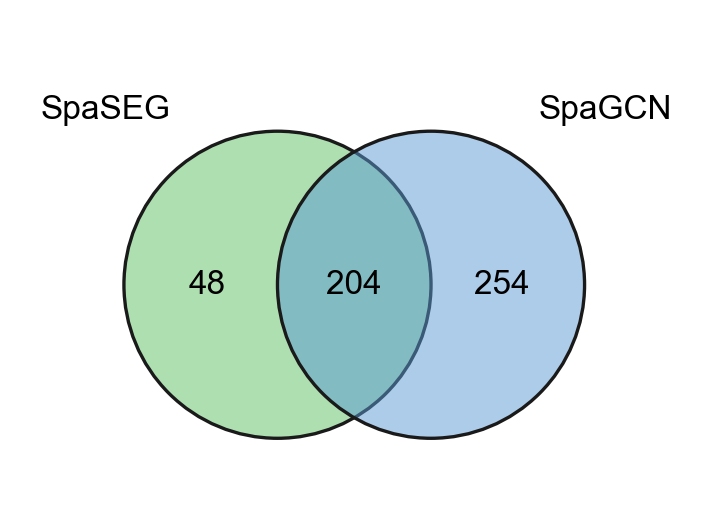

In [8]:
labels = get_labels([
    SpaSeg_svg,
    SpaGCN_svg], fill=['number'])

axes_w_cm = 5
w = axes_w_cm * utils.centimeter
fig, ax = venn2(labels, names=['SpaSEG', 'SpaGCN'],figsize=(w,w),dpi=400, fontsize=6,ec='k',lw=0.6)
ax.get_legend().remove()
plt.savefig(os.path.join(wk_root, 'notebook/results/SVG/svg_ME_Venn.pdf'), bbox_inches='tight', format='pdf', dpi=400)

# Calculate Moran and Geary

In [8]:
# stereo-seq mouse embryo data result root path
data_root = utils.get_path('svg_wk_root', json_path=os.path.join(wk_root, '_data.json'))

adata = sc.read_h5ad(os.path.join(data_root, 'mouse_embryo/preprocessed_ME.h5ad'))
SpaSEG_cluster = pd.read_csv(os.path.join(data_root, 'mouse_embryo/ME_bin50_metadata.tsv'),sep = '\t')

adata.obs['SpaSEG_clusters'] = list(SpaSEG_cluster['SpaSEG_clusters'])
adata.obs['SpaSEG_clusters'] = adata.obs['SpaSEG_clusters'].astype('str').astype('category')
adata.uns['log1p'] = {'base': None}

In [9]:
adata

AnnData object with n_obs × n_vars = 69299 × 26921
    obs: 'index', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'SCT_snn_res.1', 'annotation', 'annotation2', 'coor_x', 'coor_y', 'lineage', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'primaryanno', 'refindedanno', 'seurat_clusters', 'simpleanno', 'spatial_leiden_res1', 'spatial_leiden_res2', 'spatial_leiden_res3', 'annotation3', 'chip', 'batch', 'simpleanno2', 'S_score', 'G2M_score', 'phase', 'n_counts', 'annotation4', 'array_col', 'array_row', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_clusters'
    var: 'n_cells-2', 'n_cells-3', 'n_cells-4', 'n_cells-5', 'n_cells-6', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', '

In [10]:
import squidpy as sq
sq.gr.spatial_neighbors(adata,n_rings=2, coord_type="grid", n_neighs=10)

In [11]:
SpaSeg_svg = np.unique(df_group['gene'].values).tolist()
SpaGCN_svg = np.unique(spagcn_svg_me['genes'].values).tolist()

In [12]:
len(SpaSeg_svg),len(SpaGCN_svg)

(252, 458)

In [13]:
adata_spaseg = sq.gr.spatial_autocorr(adata,mode="moran",genes=SpaSeg_svg,n_perms=1000,n_jobs=5,copy=True)
adata_spagcn = sq.gr.spatial_autocorr(adata,mode="moran",genes=SpaGCN_svg,n_perms=1000,n_jobs=5,copy=True)

  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

In [14]:
adata_spaseg['algo']='SpaSEG'
adata_spagcn['algo']='SpaGCN'
merge_moran = pd.concat([adata_spaseg, adata_spagcn])
merge_moran.reset_index(inplace=True,names=['genes'])
merge_moran.to_csv(os.path.join(wk_root, 'notebook/results/SVG/svg_me_svg_moran_0.75_8.csv'), index=False)

In [15]:
adata_spaseg = sq.gr.spatial_autocorr(adata,mode="geary",genes=SpaSeg_svg,n_perms=1000,n_jobs=5,copy=True)
adata_spagcn = sq.gr.spatial_autocorr(adata,mode="geary",genes=SpaGCN_svg,n_perms=1000,n_jobs=5,copy=True)

adata_spaseg['algo']='SpaSEG'
adata_spagcn['algo']='SpaGCN'
merge_geary = pd.concat([adata_spaseg, adata_spagcn])
merge_geary.reset_index(inplace=True,names=['genes'])
merge_geary.to_csv(os.path.join(wk_root, 'notebook/results/SVG/svg_me_svg_geary_0.75_8.csv'), index=False)

  0%|          | 0/100 [00:00<?, ?/s]

  0%|          | 0/100 [00:00<?, ?/s]

# Plot

In [5]:
merge_moran=pd.read_csv(os.path.join(data_root, 'mouse_embryo/svg_me_svg_moran_0.75_8.csv'))
merge_geary=pd.read_csv(os.path.join(data_root, 'mouse_embryo/svg_me_svg_geary_0.75_8.csv'))

In [6]:
merge_moran[['I','algo']].groupby('algo').agg(['min','max','mean','median','std'])

I                                        
             min       max      mean    median       std
algo                                                    
SpaGCN  0.037048  0.818455  0.253019  0.208061  0.158920
SpaSEG  0.051292  0.829433  0.319554  0.304676  0.167466

In [7]:
merge_geary['adj_C'] = 1- merge_geary['C']

In [8]:
merge_geary[['adj_C','algo']].groupby('algo').agg(['min','max','mean','median','std'])

adj_C                                        
             min       max      mean    median       std
algo                                                    
SpaGCN  0.037954  0.818614  0.254241  0.209243  0.158684
SpaSEG  0.051786  0.829537  0.320608  0.306751  0.167160

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SpaSEG vs. SpaGCN: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.000e-07 U_stat=7.130e+04


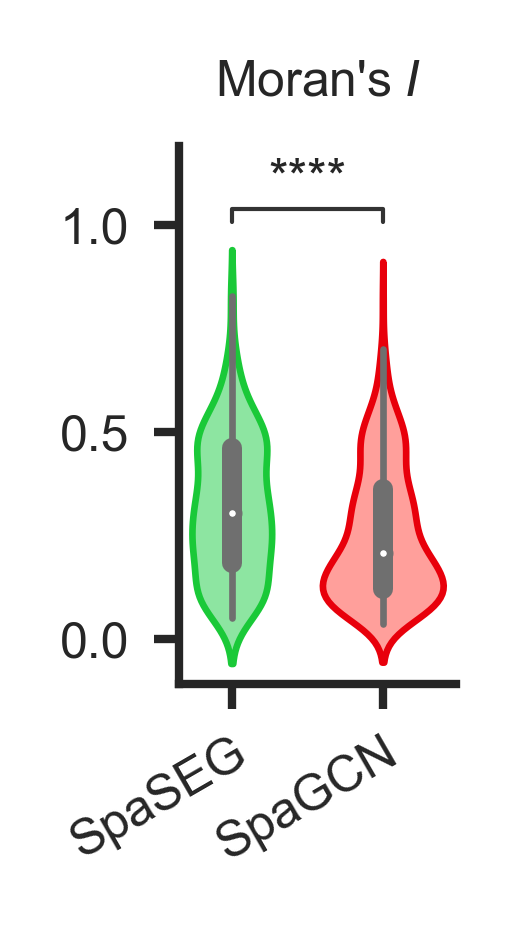

In [20]:
# svg/contrib_code_arrange/ME/downstream_analysis/MoranI_Geary/Statistic_SVG_SpaSEG_SpaGCN_-MoranI_Geary.ipynb
from statannotations.Annotator import Annotator
axes_w_cm = 1.5
axes_h_cm = 3
w = axes_w_cm * utils.centimeter
h = axes_h_cm * utils.centimeter

fig,ax=plt.subplots(figsize=(w,h))

bg_f = ['#8de5a1', '#ff9f9b']
ln_f = ['#1ac938', '#e8000b']

orders = ['SpaSEG','SpaGCN']
palette = dict(zip(orders, bg_f))

plot_param={
        'data':merge_moran,
        'x':'algo',
        'y':'I',
        'order':orders
    }

axa = sns.violinplot(**plot_param,
                          ax=ax, palette=palette,
                          showfliers=False, 
                          linewidth=0.8,
                          width=0.8,saturation=1)
j = 0
for i,artist in enumerate(ax.collections): 
    if i%2==0:
        artist.set_edgecolor(ln_f[j])
        j+=1

comp_pairs = [('SpaSEG','SpaGCN')]
annot = Annotator(axa, pairs=comp_pairs, **plot_param,plot="violinplot")
annot.configure(test='Mann-Whitney', comparisons_correction="BH", text_format='star', 
                    line_width=0.5,fontsize=6,loc='inside',line_height=0.03, text_offset=0.5)
annot.apply_and_annotate()

xticklabels = ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right',rotation_mode="anchor")
for i, xticklabel in enumerate(xticklabels):
    xticklabel.set_y(xticklabel.get_position()[1] +  0.01)
ax.tick_params(direction='out', length=3, pad=3, width=1)
sns.despine()
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Moran's $\it I$")
plt.savefig(os.path.join(wk_root, 'notebook/results/SVG/svg_ME_moran.pdf'), bbox_inches='tight', format='pdf', dpi=400)



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SpaSEG vs. SpaGCN: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.079e-07 U_stat=7.129e+04


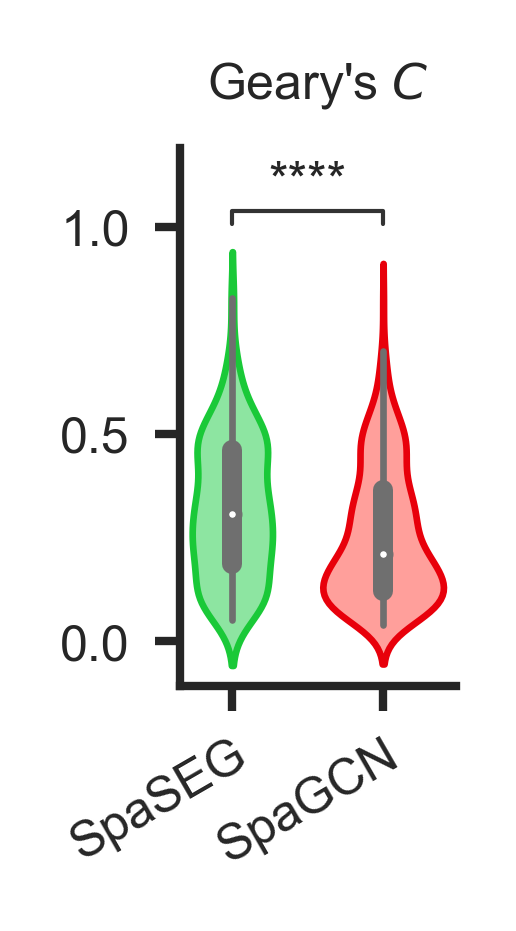

In [11]:
from statannotations.Annotator import Annotator
axes_w_cm = 1.5
axes_h_cm = 3
w = axes_w_cm * utils.centimeter
h = axes_h_cm * utils.centimeter

fig,ax=plt.subplots(figsize=(w,h))

bg_f = ['#8de5a1', '#ff9f9b']
ln_f = ['#1ac938', '#e8000b']

orders = ['SpaSEG','SpaGCN']
palette = dict(zip(orders, bg_f))

plot_param={
        'data':merge_geary,
        'x':'algo',
        'y':'adj_C',
        'order':orders
    }

axa = sns.violinplot(**plot_param,
                          ax=ax, palette=palette,
                          showfliers=False, 
                          linewidth=0.8,
                          width=0.8,saturation=1, inner ='box')
j = 0
for i,artist in enumerate(ax.collections): 
    if i%2==0:
        artist.set_edgecolor(ln_f[j])
        j+=1

comp_pairs = [('SpaSEG','SpaGCN')]
annot = Annotator(axa, pairs=comp_pairs, **plot_param,plot="violinplot")
annot.configure(test='Mann-Whitney', comparisons_correction="BH", text_format='star', 
                    line_width=0.5,fontsize=6,loc='inside',line_height=0.03, text_offset=0.5)
annot.apply_and_annotate()

xticklabels = ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right',rotation_mode="anchor")
for i, xticklabel in enumerate(xticklabels):
    xticklabel.set_y(xticklabel.get_position()[1] +  0.01)
ax.tick_params(direction='out', length=3, pad=3, width=1)

sns.despine()
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title(r"Geary's $\it C$")
plt.savefig(os.path.join(wk_root, 'notebook/results/SVG/svg_ME_geary.pdf'), bbox_inches='tight', format='pdf', dpi=400)

# Running Time

In [22]:
run_time = {'SpaSEG': 10785.014509916306/60, 'SpaGCN': 318.47}

algos = list(run_time.keys())
time_minutes = list(run_time.values())

time_df = pd.DataFrame(data={'algo':algos, 'time':time_minutes})

In [23]:
time_df

,algo,time
0,SpaSEG,179.750242
1,SpaGCN,318.470000


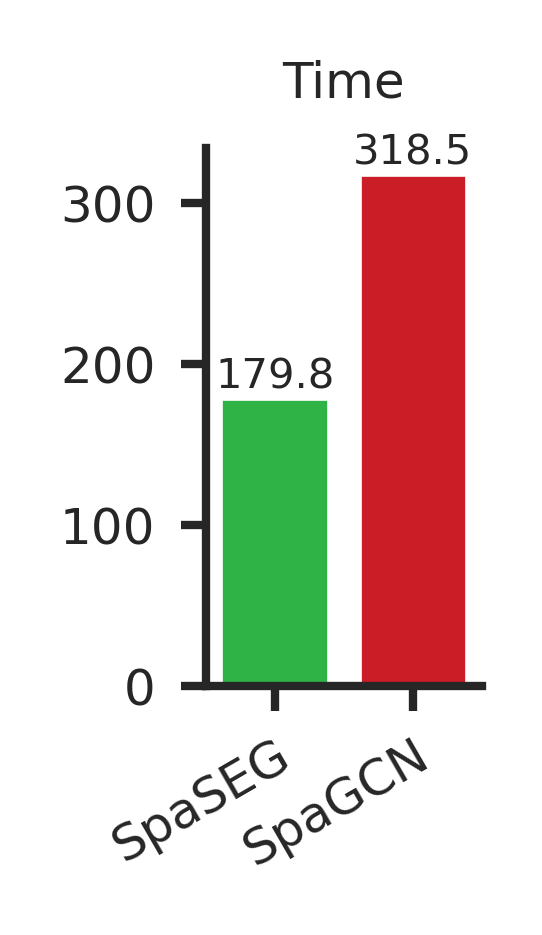

In [30]:
bg_f = ['#8de5a1', '#ff9f9b']
ln_f = ['#1ac938', '#e8000b']

orders = ['SpaSEG','SpaGCN']
palette = dict(zip(orders, ln_f))

axes_w_cm = 1.5
axes_h_cm = 3
w = axes_w_cm * utils.centimeter
h = axes_h_cm * utils.centimeter

fig = plt.figure(figsize = (w, h))
# plt.yscale("log")
# creating the bar plot
ax = sns.barplot(data=time_df, x='algo',y='time', palette=palette, order=orders)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Time")
# plt.xticks(rotation = 30)
xticklabels = ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right',rotation_mode="anchor")
for i, xticklabel in enumerate(xticklabels):
    xticklabel.set_y(xticklabel.get_position()[1] +  0.01)
ax.tick_params(direction='out', length=3, pad=3, width=1)

for i in ax.containers:
    ax.bar_label(i,fmt='%.1f', fontsize=5)

sns.despine()
# for i in ax.containers:
#     ax.bar_label(i,)
    
# ax.set_title("Running Time(minutes)")
plt.savefig(os.path.join(wk_root, 'notebook/results/SVG/svg_ME_runningtime.pdf'), bbox_inches='tight', format='pdf', dpi=400)

# SpaGCN domains

n=30

In [39]:

# me_data_root = utils.get_path('me_wk_qiuhong_root', json_path=os.path.join(wk_root, '_data.json'))

# _adata_ = sc.read_h5ad(os.path.join(me_data_root, 'cache/preprocessed_ME_merge_data_0702_E15.5_NewSpatial.h5ad'))

# _adata_.obsm['spatial'] = _adata_.obsm['spatial'][:,[1,0]]*-1
# _adata_.obsm['spatial'][:,[0]] = _adata_.obsm['spatial'][:,[0]]*-1

# SpaGCN_result = pd.read_csv('/hwfssz1/ST_HEALTH/P20Z10200N0170/luoqiuhong/Spaceomics/data/ME/merge_data_0702_E15.5/result/SpaGCN_result/SpaGCN_obs_preprocessed_ME_merge_data_0702_E15.5_NewSpatial_NewVarname.csv')

# _adata_.obs['SpaGCN_pred'] = list(SpaGCN_result['pred'])
# _adata_.obs["SpaGCN_pred"]=_adata_.obs["SpaGCN_pred"].astype('category')

# _adata_.uns['log1p'] = {'base': None}

In [40]:
# SpaGCN_result.shape

(69299, 48)

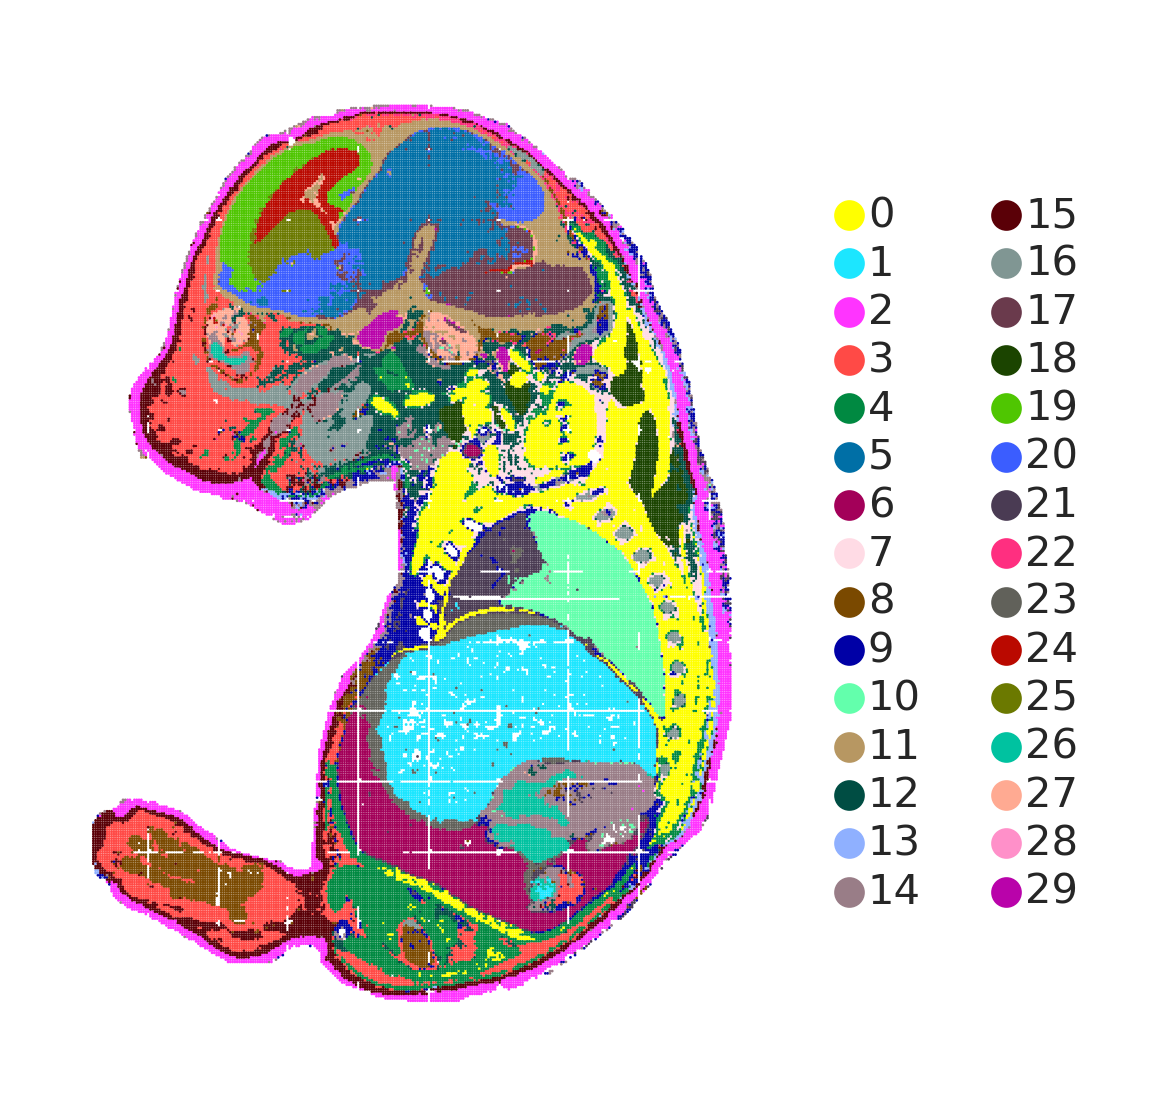

In [44]:
# fig,ax=plt.subplots(figsize=(5.5*utils.centimeter, 5.5*utils.centimeter))
# sc.pl.spatial(_adata_, img_key=None, color="SpaGCN_pred",
#               spot_size=1.2, show=False,ax = ax,frameon=False)
# ax.set_title(None)
# leg=ax.legend(loc='upper right', bbox_to_anchor=[1.5, 0.9], ncol=2, frameon=False,
#            markerscale=0.6, labelspacing=0.2, fontsize=5,
#           handleheight= 0.8, handlelength=0.1
#          )
# # leg.get_title().set_fontsize('5')
# plt.savefig(os.path.join(wk_root, "notebook/results/SVG/ME_domain_SpaGCN.pdf"), bbox_inches='tight', format='pdf', dpi=400)
